
Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
data_path = '../../data/yulu_rental.csv'
df = pd.read_csv(data_path)

 **Change the datatype of the datatime column to datatime.**
     **Create two new columns: date (containing only the day) and hour (containing only the hour)**

In [11]:
df.datetime = pd.to_datetime(df.datetime)

In [21]:
df['date'] = df.datetime.dt.date

In [81]:
df['time'] = df.datetime.dt.hour

**The first hypothesis**
- *Is there a difference in the number of bikes for rent at different times of the day?*

In [203]:
df_time = df[['time', 'registered', 'casual']].groupby('time').mean()

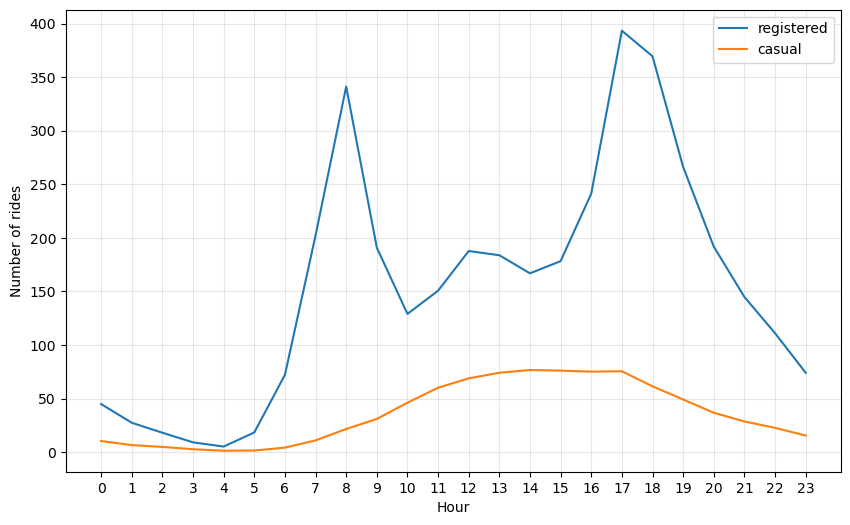

In [205]:
df_time.plot(figsize=(10,6))
plt.xticks(np.arange(0,24))
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.grid(axis='both', alpha=.3);

**Conclusion**
- *Yes, there is a difference in the number of rides between different hours.*
- *For registered users there are two peaks in the number of rides. The first peak is around 8am and the second around 5-6pm.*
- *For casual users there are no peaks, but you can see that the most popular time for rides is between 10am and 7pm.*
- *I think it is important to know the time of active hours when bikes must be available and the time when technical checks can be done.*

**The second hypothesis**
- *What temperatures and humidity ranges are typical for the different seasons and weather types in the area?*

In [169]:
df_season = df[['temp', 'season', 'humidity','date']].groupby('date').mean()

In [171]:
df_weather = df[['temp', 'weather', 'humidity','date']].groupby('date').mean()

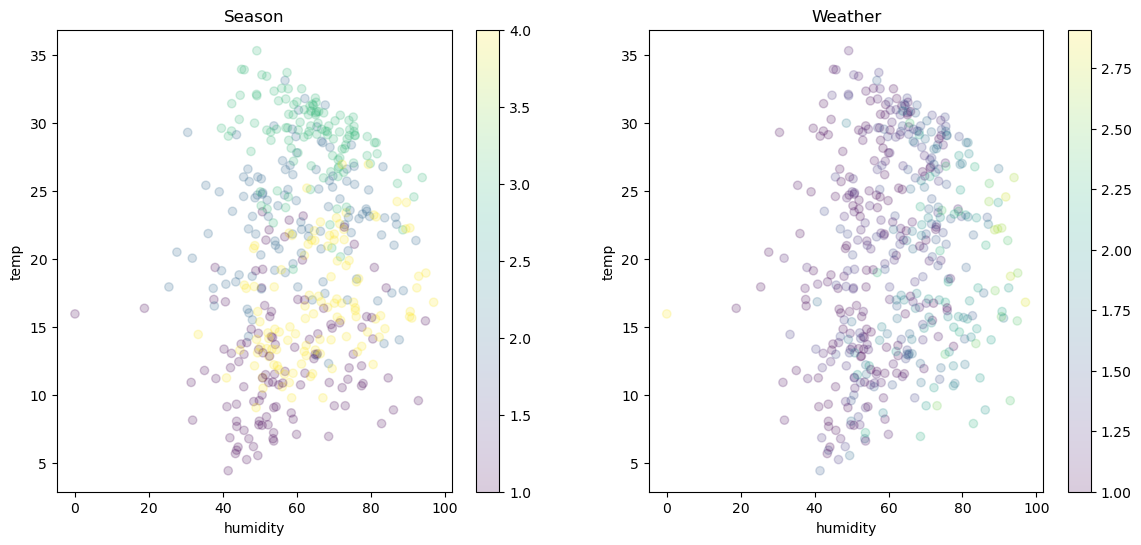

In [175]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(data=df_season, x='humidity', y='temp', alpha=0.2, c='season')
plt.xlabel('humidity')
plt.ylabel('temp')
plt.title('Season')
plt.colorbar();

plt.subplot(1, 2, 2)
plt.scatter(data=df_weather, x='humidity', y='temp', alpha=0.2, c='weather')
plt.xlabel('humidity')
plt.ylabel('temp')
plt.title('Weather')
plt.colorbar();

In [183]:
df[df.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,reg_percent,cas_percent
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,18,0.009331,0.00153


**Conclusion**
- *The first graph, Season, shows that in this region the only season that differs in temperature is summer. This can be seen by all the green dots at the top of the graph with the higher temperature. The other seasons have similar weather conditions as the other coloured dots are concentrated in the same place.*
- *The second graph, Weather, shows different types of weather and their temperatures and humidities. The dots on the graph are the same that we see on the first graph, only the colours now show us the weather type. As we can see the weather type 1 (purple dots) with the greatest weather conditions is located from the left side with different level of temperature and humidity between 40-60*
- *Comparing the first and second graphs, it is clear that the summer season is not the only one that is described as Weather Type 1. I think that because the seasons in this region are not stable (defined) and the weather conditions are pleasant for cycling most of the year (only one row has weather type 4), it makes sense to check the impact of the weather conditions only, without dividing them into seasons or weather types.*

**The third hypothesis**
- *What type of weather conditions (temperature, humidity, wind speed) may or may not affect the number of registered users divided into 3 groups?*
- *High number of rentals per day*
- *Medium number of rentals per day*
- *Low number of rentals per day*

In [300]:
df_by_date = df[['temp', 'humidity', 'windspeed', 'registered', 'date']].groupby('date').mean()

In [302]:
df_by_date.describe(percentiles=[0.01,0.25,0.50,0.75,0.99])

,temp,humidity,windspeed,registered
count,456.000000,456.000000,456.000000,456.000000
mean,20.186671,61.889357,12.805332,155.140707
std,7.379281,14.192906,5.129944,61.877290
min,4.407500,0.000000,1.500242,21.347826
1%,6.045717,31.014130,3.713115,28.659239
25%,14.068125,51.218750,9.199956,112.333333
50%,20.551250,61.854167,12.146123,154.500000
75%,26.615833,71.843750,15.612960,201.552083
99%,33.495292,92.954167,27.585701,280.929167
max,35.328333,97.041667,33.999988,287.958333


In [304]:
def category_of_amount_rents(reg_amount):
    if reg_amount >= 201:
        return 1  # high amount of rents per day
    if reg_amount < 201 and reg_amount > 112:
        return 2  # middle amount of rents per day
    else:
        return 3  # low amount of rents per day

In [306]:
df_by_date['rent_category'] = df_by_date.registered.apply(category_of_amount_rents)

In [308]:
df_by_date.head()

,temp,humidity,windspeed,registered,rent_category
date,,,,,
2011-01-01,14.110833,80.583333,10.749871,27.250000,3
2011-01-02,14.902609,69.608696,16.652122,29.130435,3
2011-01-03,8.050909,43.727273,16.636709,55.863636,3
2011-01-04,8.200000,59.043478,10.739809,63.217391,3
2011-01-05,9.305217,43.695652,12.522300,66.000000,3


<Figure size 400x400 with 0 Axes>

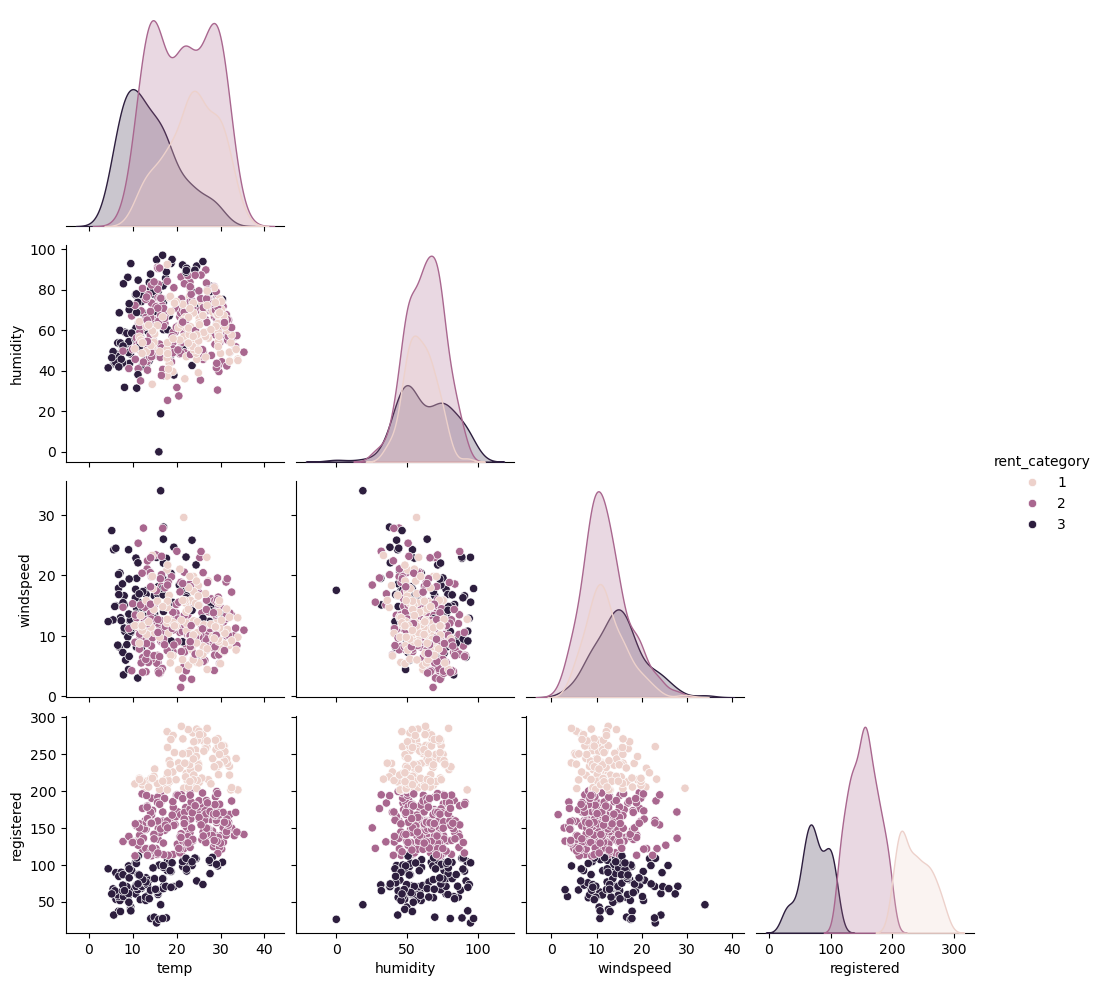

In [314]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df_by_date, hue='rent_category', corner=True);

**Conclusion**
- *After taking a closer look at the graph, it is clear that the difference between the 3 groups of registered users' amount of rides per day: high, medium and low, is only true for temperature. The third group, with a low number of rides, has a tendency in a temperature to the left to lower temperatures.*
- *For humidity and wind speed, all 3 groups are mostly in the same range if we don't take outliers into account.*
- *Maybe the humidity of the first group with the high amount of rides is a bit more centralised in between 45-75 when for the second and third groups it goes to the right to 100.*